# 20211008 (MLP)

5기 Level 1 MLP 자료입니다.

# Contents

1. 인공지능의 빙하기 - 첫 번째
2. 해결책: MLP (Multi-Layer Perceptron)
3. 인공지능의 빙하기 - 두 번째 (Vanishing Gradient와 Overfitting)
4. 해결책: Activation Function, Regularization, Optimizer, Initializer, ...

해당 교육자료는 다음 자료를 참고하여 작성되었습니다.

* https://www.insilicogen.com/blog/340
* https://github.com/heartcored98/Standalone-DeepLearning
* https://subinium.github.io/introduction-to-activation/
* https://excelsior-cjh.tistory.com/177

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

#보통 머신러닝은 sklearn많이 썼는데, 딥 러닝은 구글에서 만든 텐서플로어 많이 쓴다 페이스북이 만든 파이토치도 쓰고 등등
#keras 텐서플로어 안에속해있던 내용, 케라스랑 텐서가좀더 쉬운느낌, 근데 파이토치 많이쓴다
import tensorflow as tf

from tensorflow.keras.layers import Input, Dense, Activation, Flatten, Dropout, BatchNormalization 
#layer에서는 위와같은 것들 가져오고
from tensorflow.keras.models import Model
#model에서는 model만
from tensorflow.keras.optimizers import SGD, Adam
#optimizer는 다음 시간에

# 1. 인공지능의 빙하기 - 첫 번째

인공지능은 1940년대부터 지금까지 다양한 시련을 겪으며 성장하였습니다. 어떠한 점들이 인공지능의 성장을 방해하였는지 우선 확인해봅시다.

## 1-1. 1969년, XOR gate Problem

1950년대의 인공지능 연구는 크게 '기호주의(Symbolism)'와 '연결주의(Connectionism)'로 구분되었습니다. 기호주의은 인간의 지능과 지식을 기호화해 매뉴얼화하는 접근법이었고, 연결주의는 1943년 월터 피츠와 워런 맥컬럭이 연구한 뇌 신경 네트워크의 재현을 목표로 하는 접근법이었습니다. 각 장단점이 있었으나 1950년대에 현실적으로 실현 가능한 기호주의 분야가 사람들의 관심을 더 받고 있었습니다.

1958년 기호주의로 독주하고 있던 마빈 민스키(Marvin Lee Minsky)에게 도전장을 내민이가 있었으니, 바로 퍼셉트론(Perceptron)을 고안한 마빈 민스키의 1년 후배인 프랭클린 로젠 블랫(Frank Rosenblatt)입니다. 퍼셉트론은 인공신경망(딥러닝)의 기본이 되는 알고리즘으로 월터 피츠와 워런 맥컬럭의 뇌 모델과 1949년에 발표된 도널드 헵(Donald Hebb)의 ‘헵의 학습이론’에 힌트를 얻어 가중치를 추가한 업그레이드 버전이었죠. 이렇게 세상 밖으로 나온 퍼셉트론은 사람들의 사진을 대상으로 남자와 여자를 구별해내고 뉴욕 타임즈에 실리게 됩니다. 인공지능 연구의 트렌드가 기호주의에서 연결주의로 넘어오게 되는 계기가 되었죠.

하지만, 마빈 민스키(Marvin Lee Minsky)는 제자 시모어 페퍼트(Seymour Papert)와 퍼셉트론의 한계를 수학적으로 증명하면서 로젠 블랫의 퍼셉트론이 무너지고 2년 뒤인 1971년 로젠 블랫이 사망하면서 인공지능의 빙하기가 도래하게 됩니다.

<p align="center">
  <img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FNalwG%2FbtqxdrzsQAV%2FUY3iSEDRakKDjoWEpRHRWk%2Fimg.png" alt="text"/> </p>

사진 출처: https://ynebula.tistory.com/22

AND Gate는 두 개의 input이 모두 1일 경우에만 1을 반환하고, 다른 경우에는 0을 반환합니다. OR Gate는 모두 0일 경우에만 0을 반환하고, 다른 경우에는 1을 반환합니다. 이전까지의 방식(직선 한 개로 구분)으로는 AND Gate와 OR Gate를 문제 없이 구현할 수 있습니다. 반면, XOR Gate는 두 input이 서로 같은 경우에 0을 반환하고, 서로 다른 경우에 1을 반환하는데, 이는 직선 하나로 절대 구분할 수 없습니다.
그래서 문제를 먹었다..

# 2. 해결책: MLP (Multi-Layer Perceptrons)

지금까지는 input data를 넣으면 짠하고 나오는 구조였는데, 이제는 멀티 레이어를 넣는다 인풋과 아웃풋 사이에 다양한 층을 넣는다..어떻게 가능한가? UAT정리에 대한 논문 찾아봐라 layer를 함수로 보고 중간중간 비선형 함수를 끼어넣는다??

1986년 인공지능의 첫 번째 빙하기를 깨고 인공지능의 부활을 알린 사람이 있었으니 바로 딥 러닝의 아버지라 불리는 제프리 힌튼(Geoffrey Everest Hinton)입니다. 제프리 힌튼 교수는 다층 퍼셉트론(Multi-Layer Perceptrons, MLP)과 Back-propagation Algorithm을 실험적으로 증명하였고 이를 통해 XOR 문제를 해결하였습니다. 선을 두개그었더니 해결된다는거임

## 기존의 방법과 비교

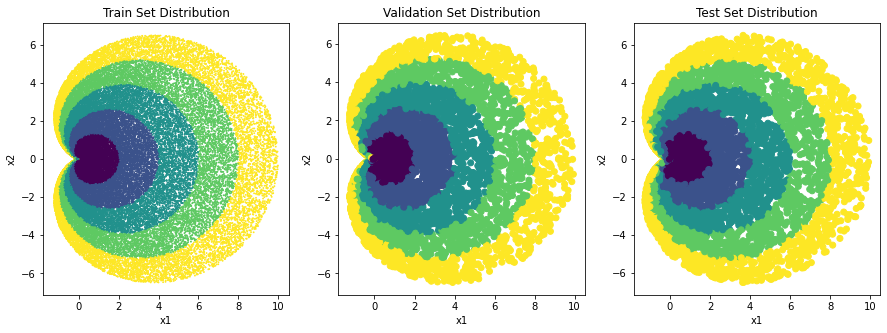

In [ ]:
# ====== Generating Dataset ====== #
r = np.random.rand(100000)*5
theta = np.random.rand(100000)*2*np.pi
y = r.astype(int)
r = r * (np.cos(theta) + 1)
x1 = r * np.cos(theta)
x2 = r * np.sin(theta)
X = np.array([x1, x2]).T

# ====== Split Dataset into Train, Validation, Test ======#
X_train, y_train = X[:80000, :], y[:80000]
X_val, y_val = X[80000:90000, :], y[80000:90000]
X_test, y_test = X[90000:, :], y[90000:]

# ====== Visualize Each Dataset ====== #
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 3, 1)
ax1.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=0.7)
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_title('Train Set Distribution')


ax2 = fig.add_subplot(1, 3, 2)
ax2.scatter(X_val[:, 0], X_val[:, 1], c=y_val)
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_title('Validation Set Distribution')

ax3 = fig.add_subplot(1, 3, 3)
ax3.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_title('Test Set Distribution')

plt.show()

## 기존 방법 1

In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train.astype(int))

y_pred_test = clf.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.26      0.77      0.39      2004
           1       0.26      0.08      0.12      1948
           2       0.18      0.05      0.08      2086
           3       0.14      0.03      0.05      1934
           4       0.31      0.40      0.35      2028

    accuracy                           0.27     10000
   macro avg       0.23      0.26      0.20     10000
weighted avg       0.23      0.27      0.20     10000



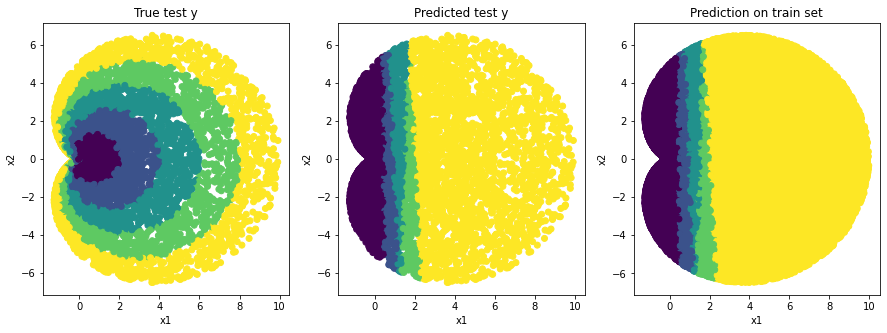

In [ ]:
fig = plt.figure(figsize=(15, 5))

y_pred_train = clf.predict(X_train)

# ====== True Y Scattering ====== #
ax1 = fig.add_subplot(1, 3, 1)
ax1.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_title('True test y')

# ====== Predicted Y Scattering ====== #
ax2 = fig.add_subplot(1, 3, 2)
ax2.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_test)
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_title('Predicted test y')

# ====== Just for Visualizaing with High Resolution ====== #
input_x = X_train

ax3 = fig.add_subplot(1, 3, 3)
ax3.scatter(X_train[:, 0], X_train[:, 1], c=y_pred_train)
ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_title('Prediction on train set')

plt.show()

## 기존 방법 2

기존의 선형회귀는 Dense Layer로 동일하게 구현할 수 있습니다. 이를 Fully Connected Layer라고도 부릅니다.
hidden layer 없는 모델 deeplearning 아님

In [ ]:
inputs = Input(shape=(2)) #input은 2개
outputs = Dense(5, activation="softmax")(inputs)  #dense는 regression이라고 보면됨 요즘은 dense 또는 FC라고 부름
#ouput 5개 왜?
model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=SGD(0.1), loss="sparse_categorical_crossentropy", metrics=["accuracy"]) #complile은 어떤 식으로 학습 시키겠다
#loss 우리는 보통 MSE많이 쓰는데 우리는 본류하니까 categorical corssentropy라는 거 쓴다. metric은 판단하는 지표인데 accuracy보여준다.
#metrics에 F1 score 넣어주면 F1 score도 보여준다.

In [ ]:
history = model.fit(X_train, y_train, batch_size=256, epochs=50, validation_data=(X_val, y_val), verbose=1)

Epoch 1/50
313/313 [==============================] - 1s 2ms/step - loss: 1.5922 - accuracy: 0.2533 - val_loss: 1.5621 - val_accuracy: 0.2562
Epoch 2/50
313/313 [==============================] - 1s 2ms/step - loss: 1.5610 - accuracy: 0.2579 - val_loss: 1.5612 - val_accuracy: 0.2517
Epoch 3/50
313/313 [==============================] - 1s 2ms/step - loss: 1.5609 - accuracy: 0.2575 - val_loss: 1.5612 - val_accuracy: 0.2570
Epoch 4/50
313/313 [==============================] - 1s 2ms/step - loss: 1.5610 - accuracy: 0.2587 - val_loss: 1.5618 - val_accuracy: 0.2560
Epoch 5/50
313/313 [==============================] - 1s 2ms/step - loss: 1.5607 - accuracy: 0.2586 - val_loss: 1.5626 - val_accuracy: 0.2775
Epoch 6/50
313/313 [==============================] - 1s 2ms/step - loss: 1.5610 - accuracy: 0.2573 - val_loss: 1.5627 - val_accuracy: 0.2754
Epoch 7/50
313/313 [==============================] - 1s 2ms/step - loss: 1.5610 - accuracy: 0.2575 - val_loss: 1.5617 - val_accuracy: 0.2572
Epoch 

In [ ]:
model.evaluate(X_test, y_test, batch_size=256)

40/40 [==============================] - 0s 2ms/step - loss: 1.5597 - accuracy: 0.2668


[1.5597089529037476, 0.2667999863624573]

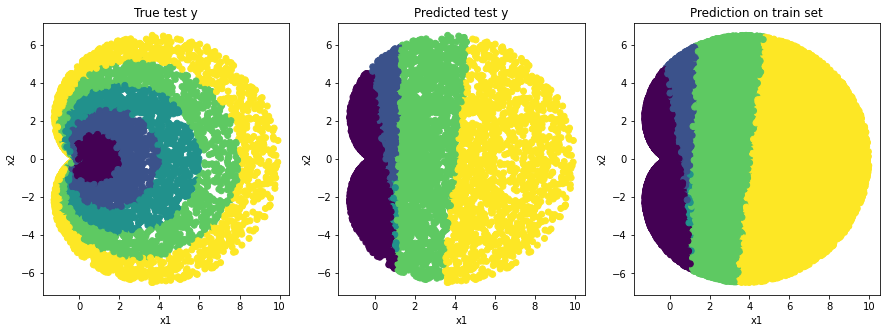

In [ ]:
fig = plt.figure(figsize=(15, 5))

y_pred_test = np.argmax(model.predict(X_test), axis=-1)
y_pred_train = np.argmax(model.predict(X_train), axis=-1)

# ====== True Y Scattering ====== #
ax1 = fig.add_subplot(1, 3, 1)
ax1.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_title('True test y')

# ====== Predicted Y Scattering ====== #
ax2 = fig.add_subplot(1, 3, 2)
ax2.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_test)
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_title('Predicted test y')

# ====== Just for Visualizaing with High Resolution ====== #
input_x = X_train
pred_y = model.predict(X_train)

ax3 = fig.add_subplot(1, 3, 3)
ax3.scatter(X_train[:, 0], X_train[:, 1], c=y_pred_train)
ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_title('Prediction on train set')

plt.show()  #아래처럼 선으로만 구분한다 선형화되어있는 선, 

## MLP를 이용한 방법

In [ ]:
inputs = Input(shape=(2))  #input도 넣고 맨아레에 output도 넣을건데 중간에 요상한게 들어가게된다.

X = Dense(1028)(inputs)  #layer 여러개 넣는거 좋은데, 사이사이에 비선형 함수를 넣어달라
X = Activation("sigmoid")(X) #sigmoid는 비선형, hyper tangent 등 
X = Dense(512)(inputs)
X = Activation("sigmoid")(X)
X = Dense(256)(X)
X = Activation("sigmoid")(X)
X = Dense(64)(X)
X = Activation("sigmoid")(X)
#output 와 input에서 4개의 layer 들어감.
outputs = Dense(5, activation="softmax")(X)

model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               1536      
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                16448     
_________________________________________________________________
activation_3 (Activation)    (None, 64)                0   

In [ ]:
model.compile(optimizer=SGD(0.1), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, batch_size=256, epochs=50, validation_data=(X_val, y_val), verbose=1)

Epoch 1/50
313/313 [==============================] - 1s 3ms/step - loss: 1.6085 - accuracy: 0.2125 - val_loss: 1.6135 - val_accuracy: 0.2012
Epoch 2/50
313/313 [==============================] - 1s 2ms/step - loss: 1.5985 - accuracy: 0.2330 - val_loss: 1.5952 - val_accuracy: 0.2464
Epoch 3/50
313/313 [==============================] - 1s 2ms/step - loss: 1.5810 - accuracy: 0.2363 - val_loss: 1.5781 - val_accuracy: 0.1466
Epoch 4/50
313/313 [==============================] - 1s 2ms/step - loss: 1.5670 - accuracy: 0.2431 - val_loss: 1.5704 - val_accuracy: 0.2673
Epoch 5/50
313/313 [==============================] - 1s 2ms/step - loss: 1.5592 - accuracy: 0.2460 - val_loss: 1.5588 - val_accuracy: 0.2309
Epoch 6/50
313/313 [==============================] - 1s 2ms/step - loss: 1.5525 - accuracy: 0.2503 - val_loss: 1.5517 - val_accuracy: 0.2369
Epoch 7/50
313/313 [==============================] - 1s 2ms/step - loss: 1.5455 - accuracy: 0.2531 - val_loss: 1.5431 - val_accuracy: 0.2395
Epoch 

In [ ]:
def acc_loss_plot(hist):
    
    fit, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()
    
    loss_ax.plot(hist.history["loss"], "y", label="train loss")
    loss_ax.plot(hist.history["val_loss"], "r", label="val loss")
    loss_ax.set_xlabel("epoch")
    loss_ax.set_ylabel("loss")
    loss_ax.legend(loc = "upper left")
    
    acc_ax.plot(hist.history["accuracy"], "b", label="train acc")
    acc_ax.plot(hist.history["val_accuracy"], "g", label="val_acc")
    acc_ax.set_ylabel("loss")
    acc_ax.legend(loc = "upper right")
    
    plt.show()

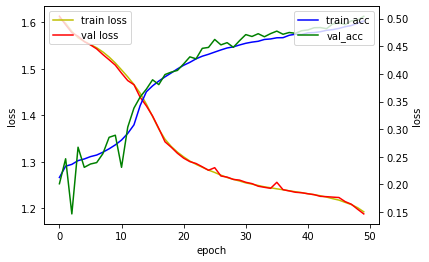

In [ ]:
acc_loss_plot(history)  #정확도 증가 val loss, train loss 감소

In [ ]:
model.evaluate(X_test, y_test, batch_size=256)

40/40 [==============================] - 0s 1ms/step - loss: 1.1846 - accuracy: 0.5030


[1.1846323013305664, 0.503000020980835]

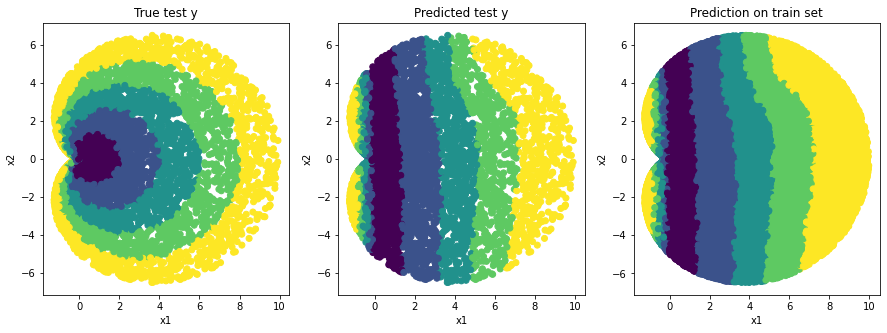

In [ ]:
fig = plt.figure(figsize=(15, 5))

y_pred_test = np.argmax(model.predict(X_test), axis=-1)
y_pred_train = np.argmax(model.predict(X_train), axis=-1)

# ====== True Y Scattering ====== #
ax1 = fig.add_subplot(1, 3, 1)
ax1.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_title('True test y')

# ====== Predicted Y Scattering ====== #
ax2 = fig.add_subplot(1, 3, 2)
ax2.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_test)
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_title('Predicted test y')

# ====== Just for Visualizaing with High Resolution ====== #
input_x = X_train
pred_y = model.predict(X_train)

ax3 = fig.add_subplot(1, 3, 3)
ax3.scatter(X_train[:, 0], X_train[:, 1], c=y_pred_train)
ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_title('Prediction on train set')

plt.show()  #정확도가 좀더 올랐음이 시각적으로 보인다. 점차 둥글어짐 그래도 아직 모자르다. 

# 3. 인공지능의 빙하기 - 두 번째

Input과 Output만 있던 기존의 모델에 비해서는 정확도가 상승하였지만, 아직은 부족한 점이 많았습니다. <br>

제프리 힌튼의 다층 퍼셉트론과 Back-propagation Algorithm을 계기로 1990년대 초반까지 인공지능 연구에 큰 발전을 이루었습니다. 그러나 1990년대 다층 퍼셉트론에서도 한계가 보이기 시작하면서 인공지능 연구의 두 번째 빙하기를 맞이하게 됩니다. 두 번째 문제는 Vanishing Gradient와 Overfitting 이었습니다. 다층 신경망의 은닉층(Hidden layer)을 늘려야 복잡한 문제가 해결 가능한데 신경망의 깊이가 깊어질수록 오히려 기울기(gradient)가 사라져 학습이 되지 않는 문제인 Vanishing Gradient가 발생했습니다. 또한, 신경망이 깊어질수록 너무 정교한 패턴을 감지하게 되어 훈련 데이터 외 새로운 데이터에 대해서는 정확성이 떨어지는 Overfitting 문제도 발생했습니다.

## 3-1. Back-propagation

신경망의 학습이 어떻게 진행되는지에 관한 이해가 우선되어야, 문제가 무엇인지 파악할 수 있습니다. 신경망의 학습은 크게 Feed Forward와 Back-propagation으로 구성되어 있습니다. 전자는 Input data가 여러 층의 Layer를 모두 통과하여 마지막 지점에 도착한 뒤 Output을 출력 과정이며, 후자는 그 Output을 바탕으로 왔던 방향으로, 즉, Feed Forward와 반대되는 순서로, 다음 학습 시에 조금 더 나은 결과를 도출할 수 있도록 weight를 갱신해주는 과정입니다(back propagation
).

<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/6/60/ArtificialNeuronModel_english.png" alt="text"/> </p>


사진 출처: https://subinium.github.io/introduction-to-activation/

위 그림에서 transfer function은 우리가 하고자 하는 연산, activation function은 연산 결과를 다음 node로 넘길지 말지 결정하는 함수, threshold는 activation function의 판정 기준이 되는 임계치입니다. 만일 activation function을 무사히 통과하였다면, 이는 다음 node에 전달됩니다.

## 3-2. Activation Function

문제 중 한 가지인 vanising gradient problem은 activation function에서부터 비롯되었습니다. activation function이 선형 함수일 경우, 이는 더 이상 MLP가 아닙니다. 함수의 합성(composition)을 통해서 여러 개의 선형 함수를 하나의 선형 함수로 표현할 수 있기 때문입니다. 또한, 미분하면 상수만 남기 때문에(미분하여 넘겨줘야한다), 적절히 back-propagation이 진행되지도 않습니다. 따라서 activation function은 기본적으로 비선형 함수입니다. 당시에는 $\text{tanh}(x)$, $\sigma(x)$, step function 등이 사용되고 있었습니다.

### 3-2-1. Step Function

$f(x)=
\begin{cases}
0, & x \leq 0 \\
1, & x > 0
\end{cases}$

매우 간단한 비선형 함수입니다.(0이하면 반환 안하고 1이면 반환) 하지만 이를 사용할 경우 $0$, $1$의 값 외에는 출력할 수 없습니다.

### 3-2-2. Sigmoid

$\sigma(x) = \frac{1} {1 + e^{-x}} = \frac{e^{x}} {1 + e^{x}}$, $\sigma'(x)= \sigma(x)(1-\sigma(x))$

Logistic Regression에서 봤었던 그 함수입니다. 미분한 결과가 자기 자신에 대한 함수로 표현되기 때문에 계산 상에서의 이점이 있어서 한동안 많이 사용되었습니다. 또한, 선형 함수 등에 비하여 임계치(sigmoid에서는 $x = 0$일 때의 값인 $0.5$) 주변에서의 값이 확실하게 구분된다는 이점도 있었습니다. 그리고 output이 $(0, 1)$ 사이로 한정된다는 점도 인기에 한몫을 하였습니다. 이러한 sigmoid를 일반화한 softmax function도 있습니다.
단점 x= 0일때, 0.5가 나옴

### 3-2-3. Hyperbolic Tangent

$\text{tanh}(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} = 2\sigma(2x) - 1$, $\text{tanh}'(x) = 1 - \text{tanh}^2(x)$

hyperbolic tangent 역시 sigmoid와 비슷한 특징들을 지니고 있지만, hyperbolic tangent의 center는, center가 $0.5$였던 sigmoid와는 달리, $0$이라는 점 때문에 이 점을 해결하고자 하는 사람들에 의하여 많이 사용되었습니다. 또한, output이 $(-1, 1)$ 사이에서 결정된다는 점 역시 차이점입니다.

## 3-3. Vanishing Gradient

Back-propagation Algorithm은 output layer에서 input layer 방향으로 gradient를 전달하며 각 뉴런의 입력값에 대한 손실함수의 gradient를 계산하는 방식으로 진행됩니다. 이렇게 계산된 gradient에 기반하여, 경사 하강법(gradient descent)을 통하여 각 가중치 매개변수가 업데이트됩니다. 문제는, 지금까지 사용되었던 step function, Sigmoid, Hyperbolic Tangent 등의 activation function은 양쪽 극단으로 갈수록 기울기가 $0$에 가까워진다는 것입니다. 따라서, hideen layer(input layer와 output layer를 제외한 layer)가 3, 4중으로만 구성되어 있어도 정확한 정보 전달이 되지 않았고, 이 때문에 한동안 Deep Learning은 다시 한 번 암흑기를 거쳐야만 했습니다.

<p align="center">
  <img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile2.uf.tistory.com%2Fimage%2F997E1B4C5BB6EAF239A91B"/> </p>

사진 출처: https://excelsior-cjh.tistory.com/177

## 3-4. Overfitting

또 다른 문제점으로는 hidden layer의 수가 많아질수록 overfitting이 될 가능성이 높아진다는 점이 지적되었습니다. 이는 Regression에서 모델을 복잡하게 설정할수록 overfitting되는 것과 같은 맥락입니다.

# 4. 해결책

## 4-1. Activation Function을 바꾸어보자.

4층만 쌓아도 막히는데 이게 deep하냐

vanishing graient problem을 해결하기 위한 다양한 activation function이 연구되기 시작하였습니다. 대표적으로 ReLU, Leaky ReLU 등이 있으며, 개인적으로는 Swish를 많이 사용하는 편입니다. 이외에도 다양한 activation function이 있으니 상황에 따라 바꾸어가면서 학습을 진행해보시기 바랍니다.

### 4-1-1. ReLU

$f(x) = max(0,x)$, $f'(x)=
\begin{cases}
0, & x \le 0 \\
1, & x > 0
\end{cases}$

activation function에 관한 연구가 진행된 이후, 지금까지 가장 일반적으로 사용되는 activation function입니다.

0보다 작으면 걍 0이되고 그이상이면 자기자신이 된다

 1960년대에 처음 언급되었으나, 2011년 전후에 deep learning model에 적극적으로 적용되기 시작하였습니다. 비선형이면서도 연산 속도가 빠르고, 필요없는 정보는 무시한다는($0$으로 만든다는) 특성 때문에 애용되고 있으나, 반대로 정보를 손실한다는 점이 ReLU의 발목을 잡고 있기도 합니다.

 0으로 죄다 처리한다는 것이 또 단점이기도 하다.

### 4-1-2. Leaky ReLU

$f(x) = max(\alpha x, x)$, $f'(x)=
\begin{cases}
\alpha, & x \le 0 \\
1, & x > 0
\end{cases}$

ReLU의 input이 음수일 때에도 조금이나마 정보를 전달하기 위하여 다음과 같은 함수가 등장하였습니다. ($\alpha$는 보통 $0.1$ 혹은 $0.01$ 정도로 설정합니다. 0을 바로 주는게 아니라 약간의 penalty를 작용하는것) 하지만 항상 ReLU보다 나은 성능을 내는 것은 아니므로(이론적으로는 참 괜찮아보이는데 그렇지 않나 싶기도하군요), ReLU와 Leaky ReLU를 서로 번갈아가면서 사용해보는 것을 추천드립니다.

### 4-1-3. Swish (or SiLU)

$f(x) = \frac{x}{1+e^{-x}} = x \cdot \sigma(x)$, $f'(x) = f(x) + \sigma(x)(1-f(x))$

최근(2017년)에 발표된 activation function으로, sigmoid에 $x$ term을 곱한 형태입니다. 많은 대회에서 현재 좋은 성적을 내고 있으나, 아직 분석 결과가 부족한 상황입니다. 

최근에 나온만큼 효율적이고 미분하면 그 자체로 나오기도하고 연산상 이득이 많다.

swish - ReLu- Leaky-Relu 이 순으로 보통 적용해본다.
근데 시그모이드랑 하이퍼 탄젠트 역시 자주쓴다. 알아놓고 이용해야한다.
히든 레이어라는 측면에서 스위시랑 렐루 리키 렐루가 좀 낫다는 것

## 4-2. Regularization

이전 시간에 확인해보았던 $L1$, $L2$ regularlization 등의 기법 외에도 다양한 regularization 기법들이 도입되기 시작합니다.

### 4-2-1. Batch Normalization

<p align="center">
  <img src="https://shuuki4.files.wordpress.com/2016/01/bn1.png?crop"/> </p>

사진 출처: https://smartstuartkim.wordpress.com/2019/02/18/batch-normalization/

Batch Normalization은 mini-batch 단위마다 data의 분포를 정규화를 시키는 기법이며, 일반적으로 activation function 직전에 수행됩니다. 이를 통해 우리는 학습 중 틀어진 data의 분포를 고르게 조정하여 activation function의 비선형성을 최대한 유지하도록 할 수 있습니다. 물론, 이를 전체 data에 대하여 수행하면 좋겠지만, 이 경우 막대한 연산이 수반되기 때문에, 실제로는 mini-batch 안의 data에 대하여 수행하게 됩니다.

### 4-2-2. Dropout

<p align="center">
  <img src="https://kh-kim.github.io/nlp_with_deep_learning_blog/assets/images/1-14/04-dropout_overview.png"/> </p>

사진 출처: https://kh-kim.github.io/nlp_with_deep_learning_blog/docs/1-14-regularizations/04-dropout/

overfitting을 방지하는 하나의 방법으로 dropout이라는 방식이 고려되었습니다. 이는 중간의 node를 일정 확률로 꺼버리는 기능을 합니다. 일정 확률로 꺼지고 켜진다. 즉, 의도적으로 정보의 전달을 일정 정도 차단하는 것입니다. 그리고 꺼지는 노드의 위치는 매 학습마다 바뀌게 되는데, 이는 결국 일종의 ensemble 효과를 가져오게 됩니다. (실제로는 validation 등의 이유로 인하여, dropout을 한다고 해서 parameter가 줄어들지는 않습니다. 실제 연산량으 줄어든다 이는 masking으로 구현됩니다.)

## 4-3. Initialization

초기값을 잘 지정해주는 것 역시 해결책 중 하나로 거론되었는데, 올바른 초기값이 필요한 이유는 다음과 같습니다.

<p align="center">
  <img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile24.uf.tistory.com%2Fimage%2F99C777505BB6EBD117D507"/> </p>

<p align="center">
  <img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile22.uf.tistory.com%2Fimage%2F9962F9495BB6EBE91F3CEF"/> </p>

사진 출처: https://excelsior-cjh.tistory.com/177


랜덤하게 작용하니까 위처럼 잘 적용이안된다
위의 사진은 $N(0, 0.01)$을 따르는 값으로 random하게 초기값을 설정한 뒤 hyper tangent를 activation function으로 이용하여 학습한 경우이고, 아래의 사진은 $N(0, 1)$을 따르는 값으로 random하게 초기값을 설정한 뒤 hyper tangent를 activation function으로 이용하여 학습한 경우입니다. 전자의 경우 $0$ 주변으로 데이터가 몰리고 있는 것을 확인할 수 있으며, 이 경우에는 activation function이 적절하게 분류를 하지 못 하기 때문에 올바른 학습이 진행되지 못할 것입니다. 후자의 경우 데이터가 양 극단으로 몰리고 있는 것을 확인할 수 있으며, 이는 곧 vanishing gradient problem으로 이어질 것입니다. 이처럼 적절한 초기값 설정은 매우 중요한 문제이며, 현재 Xavier(사람에 따라 Glorot이라고도 합니다) Initializer와 He Initializer가 대표적으로 사용되고 있습니다.

### 4-3-1. Xavier Initializer

<p align="center">
  <img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile29.uf.tistory.com%2Fimage%2F997C914B5BB6EC161267F0"/> </p>

사진 출처: https://excelsior-cjh.tistory.com/177

sigmoid, hyberbolic tangent 등의 activation function을 쓸 때에 적합한 initializer입니다. uniform distribution에 기반한 initializer와 normal distribution에 기반한 initializer로 다시 나뉘는데, 둘 다 평균은 $0$입니다. 전자(unfiorm)의 경우 양끝의 값을 $\pm \sqrt{\frac{6} {\text{fan in} + \text{fan out}}}$으로 잡고, 후자(normal)의 경우 표준편차를 $(\sqrt{\frac{2} {\text{fan in} + \text{fan out}}}$로 지정합니다. ($\text{fan in}$은 입력 노드의 갯수, $\text{fan out}$은 출력 노드의 갯수)

### 4-3-2. He Initializer

<p align="center">
  <img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile1.uf.tistory.com%2Fimage%2F996EE64F5BB6EC4117A6BE"/> </p>

사진 출처: https://excelsior-cjh.tistory.com/177

Xavier Initializer가 ReLu 등의 activation function을 사용할 때에 적절하지 못 하게 동작한다는 것이 확인되어(시그모이드, 하이퍼 탄젠트 등의 고전적인 애들에만 작용), 이에 맞게 적절하게 수정된 initializer입니다. 출력 노드의 갯수는 고려하지 않고, 입력 노드의 갯수만을 고려한다는 것이 Xavier initializer와의 차이점입니다.

## 4-4. 개선된 MLP

In [ ]:
inputs = Input(shape=(2)) #보여줘야하니까 다 때려박은 것 

X = Dense(1028, kernel_initializer="he_normal")(inputs)   # Initializer 설정 lelu 쓸거라 he_normal
X = BatchNormalization()(X)   # 주의: BN은 Activation 전에 실행할 것! Activation들어가고 난뒤로는 하는 의미없음
X = Activation("relu")(X)     # sigmoid 대신 relu를 적용
X = Dense(1028, kernel_initializer="he_normal")(X)
X = BatchNormalization()(X)
X = Activation("relu")(X)
X = Dropout(0.5)(X)           # Dropout은 사람마다 다르나, 보통 Activation 후에
X = Dense(256, kernel_initializer="he_normal")(X)
X = BatchNormalization()(X)
X = Activation("relu")(X)
X = Dropout(0.5)(X)
X = Dense(64, kernel_initializer="he_normal")(X)
X = BatchNormalization()(X)
X = Activation("relu")(X)       # 마지막에는 Dropout하면 원할한 정보 전달이 안 됨
outputs = Dense(5, activation="softmax")(X)   # class가 세 개임에 유의

model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1028)              3084      
_________________________________________________________________
batch_normalization (BatchNo (None, 1028)              4112      
_________________________________________________________________
activation_4 (Activation)    (None, 1028)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1028)              1057812   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1028)              4112      
_________________________________________________________________
activation_5 (Activation)    (None, 1028)              0   

In [ ]:
model.compile(optimizer=SGD(0.1), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, batch_size=256, epochs=50, validation_data=(X_val, y_val), verbose=1)

Epoch 1/50
313/313 [==============================] - 2s 5ms/step - loss: 0.9163 - accuracy: 0.6202 - val_loss: 0.8679 - val_accuracy: 0.6060
Epoch 2/50
313/313 [==============================] - 1s 4ms/step - loss: 0.7584 - accuracy: 0.6869 - val_loss: 0.6261 - val_accuracy: 0.7529
Epoch 3/50
313/313 [==============================] - 1s 4ms/step - loss: 0.7269 - accuracy: 0.6988 - val_loss: 0.5516 - val_accuracy: 0.7995
Epoch 4/50
313/313 [==============================] - 1s 4ms/step - loss: 0.7111 - accuracy: 0.7058 - val_loss: 0.5851 - val_accuracy: 0.7678
Epoch 5/50
313/313 [==============================] - 1s 4ms/step - loss: 0.6984 - accuracy: 0.7081 - val_loss: 0.5276 - val_accuracy: 0.8204
Epoch 6/50
313/313 [==============================] - 1s 4ms/step - loss: 0.6814 - accuracy: 0.7177 - val_loss: 0.5133 - val_accuracy: 0.8124
Epoch 7/50
313/313 [==============================] - 1s 4ms/step - loss: 0.6843 - accuracy: 0.7136 - val_loss: 0.5667 - val_accuracy: 0.7786
Epoch 

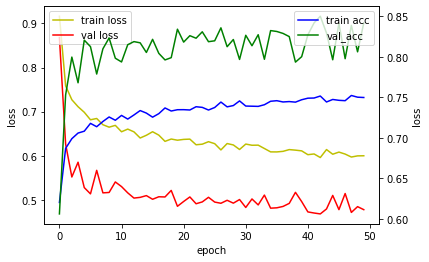

In [ ]:
acc_loss_plot(history)

In [ ]:
model.evaluate(X_test, y_test, batch_size=256)

40/40 [==============================] - 0s 2ms/step - loss: 0.4802 - accuracy: 0.8415


[0.48023682832717896, 0.8414999842643738]

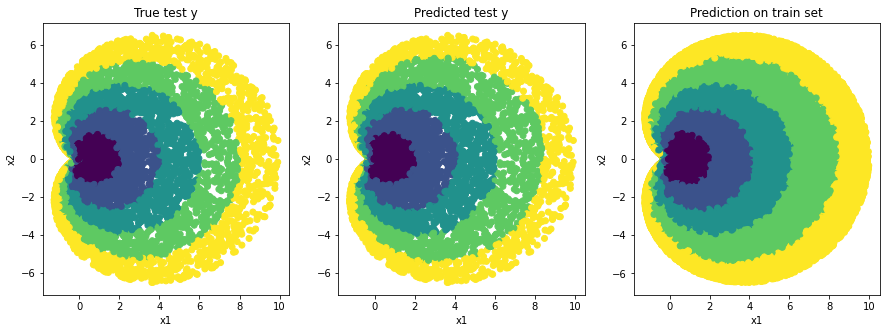

In [ ]:
fig = plt.figure(figsize=(15,5))

y_pred_test = np.argmax(model.predict(X_test), axis=-1)
y_pred_train = np.argmax(model.predict(X_train), axis=-1)

# ====== True Y Scattering ====== #
ax1 = fig.add_subplot(1, 3, 1)
ax1.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_title('True test y')

# ====== Predicted Y Scattering ====== #
ax2 = fig.add_subplot(1, 3, 2)
ax2.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_test)
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_title('Predicted test y')

# ====== Just for Visualizaing with High Resolution ====== #
input_x = X_train
pred_y = model.predict(X_train)

ax3 = fig.add_subplot(1, 3, 3)
ax3.scatter(X_train[:, 0], X_train[:, 1], c=y_pred_train)
ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_title('Prediction on train set')

plt.show()

아직 부족한 점들이 많지만, 이제 80% 이상의 정확도를 보이기 시작합니다. 다음 시간에는 다음과 같은 부분들을 확인해보겠습니다.

* Optimizer <br>
 앞서, 우리는 Gradient Descent Algorithm을 확인해보았습니다. Deep Learning에서도 해당 알고리즘을 사용하고 있고, 여러분도 방금 GD 알고리즘을 사용하셨습니다. 다음 시간에는 GD가 Deep Learning에 사용될 수 있도록 일정 정도 조절을 해주는 Optimizer에 관하여 알아보겠습니다.

* CNN <br>
 Dense 외에도 다양한 Layer들이 있습니다. 다음 시간에는 Pooling Layer와 Convolution Layer에 기반하여 구성되는 CNN Model에 관하여 알아보겠습니다.
 
* 기타 테크닉 <br>
 사실 이번 예제에 사용된 코드는 억지로(!) 성능이 안 나오게 구현되었습니다. 더 나은 퍼포먼스를 보여주기 위한 여러 방법에 관하여 알아보겠습니다.